# Option pricing
---
<style>
table {
margin: auto;
}
</style>

## BS Formula

We introduce the following notation,
+ $S$: Underlying asset's price. 
+ $K$: Option strike price. 
+ $r$: Risk-free interest rate. 
+ $T$: Time to maturity (represented as a unit-less fraction of one year). 
+ $\sigma$: Volatility of the asset. 
+ $N$: CDF of standard normal distribution. 
+ $\theta$: Annual dividend yield of the underlying asset. 


### European call option
$$BSC(S, K, r, \sigma, T, \theta)=Se^{-\theta T}N(x)-Ke^{-rT}N(x-\sigma\sqrt{T})$$ 

### European put option
$$BSP(S, K, r, \sigma, T, \theta)=Ke^{-rT}N(-x+\sigma\sqrt{T})-Se^{-\theta T}N(-x)$$ 

### Digital call option
$$V(S, K, r, \sigma, T, \theta) = e^{-rT}N(x-\sigma\sqrt{T})$$

where $x=\tfrac{ln\tfrac{S}{K}+(r-\theta+\tfrac{\sigma^{2}}{2})T}{\sigma \sqrt{T}}$.

### Greeks(part)

We introduce some common greeks in option pricing here:
+ $\Delta$: $\Delta=\tfrac{\partial V}{\partial S}$, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price.
+ $\Gamma$: $\Gamma=\tfrac{\partial^{2} V}{\partial S^{2}}$, measures the rate of changes in the delta with respect to changes in the underlying price.
+ $\nu$: $\nu=\tfrac{\partial V}{\partial \sigma}$ vega measures sensitivity to volatility.
+ $\rho$: $\rho=\tfrac{\partial V}{\partial r}$, measures sensitivity to the interest rate.
+ $\Theta$: $\Theta=\tfrac{\partial V}{\partial T}$, measures the sensitivity of the value of the derivative to the passage of time.

| Greeks    |          Calls              | Puts|
| :----:    |          :----:               | :----: |
| $\Delta$ | $$e^{-\theta T}N(x)$$ | $$-e^{-\theta T}N(-x)$$ | 
| $\Gamma$ | $$e^{-\theta T}\tfrac{N(x)}{S\sigma\sqrt{T}}=Ke^{-rT}\tfrac{N(x-\sigma\sqrt{T})}{S^{2}\sigma\sqrt{T}}$$ | $$e^{-\theta T}\tfrac{N(x)}{S\sigma\sqrt{T}}=Ke^{-rT}\tfrac{N(x-\sigma\sqrt{T})}{S^{2}\sigma\sqrt{T}}$$ |
| $\nu$ | $$Se^{-\theta T}N(x)\sqrt{T}=Ke^{-rT}N(x-\sigma\sqrt{T})\sqrt{T}$$ | $$Se^{-\theta T}N(x)\sqrt{T}=Ke^{-rT}N(x-\sigma\sqrt{T})\sqrt{T}$$ |
| $\rho$ | $$KTe^{-rT}N(x-\sigma\sqrt{T})$$ | $$-KTe^{-rT}N(-x+\sigma\sqrt{T})$$ |
| $\Theta$ | $$-e^{-\theta T}\tfrac{SN(x)\sigma}{2\sqrt{T}} - rKe^{-rT}N(x-\sigma\sqrt{T})+\theta Se^{-\theta T}N(x)$$ | $$-e^{-\theta T}\tfrac{SN(x)\sigma}{2\sqrt{T}} + rKe^{-rT}N(-x+\sigma\sqrt{T})-\theta Se^{-\theta T}N(-x)$$

In [1]:
# module to calculate call and put option with BS
import numpy as np
import scipy.stats as stats
import pandas as pd

### Set the parameters 
S = 125
K = 100
r = 0.1
sigma = 0.2
T = 1
theta = 0 # dividend only works for European options

greeks = True

### Formula 
x = (np.log(S/K) + (r - theta + sigma*sigma/2) * T) / (sigma * np.sqrt(T))
call = S * np.exp(-theta * T) * stats.norm.cdf(x) - K * np.exp(-r * T) * stats.norm.cdf(x - sigma * np.sqrt(T))
put = K * np.exp(-r * T) * stats.norm.cdf(-(x - sigma * np.sqrt(T))) - S * np.exp(-theta * T) * stats.norm.cdf(-x)
digital = np.exp(-r * T) * stats.norm.cdf(x - sigma * np.sqrt(T))

print(f"European Call price: {call}\n")
print(f"European Put price: {put}\n")
print(f"Digital price: {digital}\n")

if greeks:
    # Delta V/S
    delta_call = np.exp(-theta * T) * stats.norm.cdf(x)
    delta_put = - np.exp(-theta * T) * stats.norm.cdf(-x)
    # Gamma V^2 / S^2
    gamma = np.exp(-theta * T) * stats.norm.cdf(x) / (S * sigma * np.sqrt(T))
    # Vega V / sigma
    vega =  S * np.exp(-theta * T) * stats.norm.cdf(x) * np.sqrt(T)
    # Rho V / r
    rho_call = K * T * np.exp(-r * T) * stats.norm.cdf(x-sigma*np.sqrt(T))
    rho_put = -K * T * np.exp(-r * T) * stats.norm.cdf(-(x - sigma * np.sqrt(T)))
    # Theta -V / T
    theta_call = (-np.exp(-theta * T) * S * stats.norm.cdf(x) * sigma / (2 * np.sqrt(T)) 
                 - r * K * np.exp(-r * T) * stats.norm.cdf(x-sigma*np.sqrt(T)) 
                 + theta * S * np.exp(-theta * T) * stats.norm.cdf(x))
    theta_put = (-np.exp(-theta * T) * S * stats.norm.cdf(x) * sigma / (2 * np.sqrt(T)) 
                + r * K * np.exp(-r * T) * stats.norm.cdf(-x+sigma*np.sqrt(T)) 
                - theta * S * np.exp(-theta * T) * stats.norm.cdf(-x))
    
    greeks_table = pd.DataFrame({"Call": [delta_call, gamma, vega, rho_call, theta_call], 
                                 "Put": [delta_put, gamma, vega, rho_put, theta_put]},
                               index=['Delta', 'Gamma', 'Vega', 'Rho', 'Theta'])
    print(greeks_table)

European Call price: 34.99082845705452

European Put price: 0.47457026065047625

Digital price: 0.8462081446690777

             Call         Put
Delta    0.956893   -0.043107
Gamma    0.038276    0.038276
Vega   119.611643  119.611643
Rho     84.620814   -5.862927
Theta  -20.423246  -11.374872


### Wrapper to use

In [4]:
# costumized function for option pricing
import sys
sys.path.append("..")
from model.asset_pricing import OptionPricing

# price by black scholes
pricer = OptionPricing(S, K, r, sigma, T, theta)
price_bs = pricer.black_scholes_price(greeks=True, display=True)

European Call price: 34.99082845705452

European Put price: 0.47457026065047625

Digital price: 0.8462081446690777

             Call         Put
Delta    0.956893   -0.043107
Gamma    0.038276    0.038276
Vega   119.611643  119.611643
Rho     84.620814   -5.862927
Theta  -20.423246  -11.374872


In [5]:
# price by binomial tree
price_btree = pricer.binomial_tree_price(N=100, early_ex=False, display=True)

Binomial Tree price for call option: 34.994753002204206
Binomial Tree price for put option: 0.47849480579964876


In [6]:
# price by monte carlo simulation
price_btree = pricer.monte_carlo_price(depth=100, paths=1000, display=True)

Binomial Tree price for call option: 35.21423876471969
Binomial Tree price for put option: 0.5691013458510934


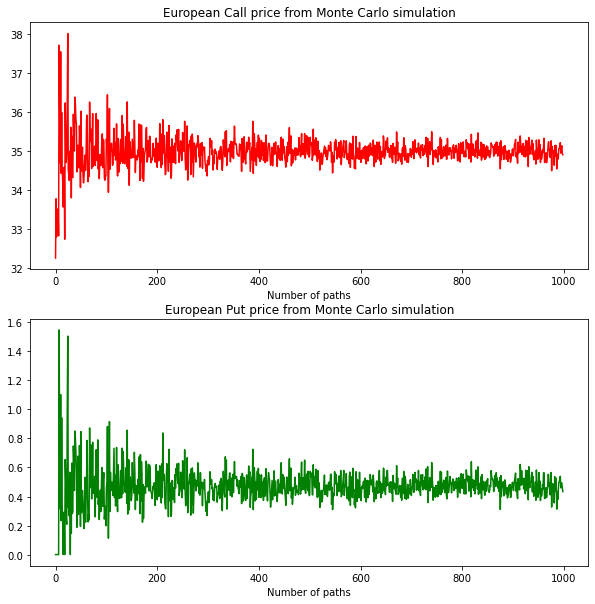

In [7]:
# plot for monte carlp simulation price path
_ = pricer.monte_carlo_price(depth=100, paths=1000, display=False, plot=True)